In [31]:
import os, json, requests, math, cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#画像の読み込み
image = []
image.append(cv2.imread('IMG-01-ALAV2A278172850-OORIRFU_002.tif'))
image.append(cv2.imread('IMG-02-ALAV2A278172850-OORIRFU_002.tif'))
image.append(cv2.imread('IMG-03-ALAV2A278172850-OORIRFU_002.tif'))
image.append(cv2.imread('IMG-04-ALAV2A278172850-OORIRFU_002.tif'))

In [33]:
# 画像に色を付与
def img_change_color(img, color):
    temp_img = cv2.split(img)
    
    # ゼロ埋めの画像配列
    if len(img.shape) == 3:
        height, width, channels = img.shape[:3]
    else:
        height, width = img.shape[:2]
        channels = 1
    zeros = np.zeros((height, width), img.dtype)
    # 色の指定
    if color == 'red':
        return cv2.merge((temp_img[1],zeros,zeros))
    elif color == 'green':
        return cv2.merge((zeros,temp_img[1],zeros))
    elif color == 'blue':
        return cv2.merge((zeros,zeros,temp_img[1]))

In [34]:
#実際に色を付けて、配列に取り込む
band_red = []
band_green = []
band_blue = []
for iamge_index in range(len(image)):
    band_red.append(img_change_color(image[iamge_index], 'red'))
    band_green.append(img_change_color(image[iamge_index], 'green'))
    band_blue.append(img_change_color(image[iamge_index], 'blue'))

In [35]:
add_red_green_blue = []
for red_index in range(len(band_red)):
    for green_index in range(len(band_green)):
        #RGがband1-band1のような組み合わせを回避
        if red_index != green_index:
                for blue_index in range(len(band_blue)):
                    #RGBがband1-band2-band1やband1-band2-band2のような組み合わせを回避
                    if red_index != blue_index and green_index != blue_index:
                        rgb = [band_red[red_index], band_green[green_index], band_blue[blue_index]]
                        add_red_green_blue.append(rgb)
                        

In [36]:
rgb_img = []
for i in range(len(add_red_green_blue)):
    #rg_imgにadd_red_green_blueに追加したband_redとband_greenの要素を合成
    rg_img = cv2.addWeighted(add_red_green_blue[i][0],1,add_red_green_blue[i][1],1,0)
    #rgb_imgの配列にrg_imgとband_blueを合成した結果を追加
    rgb_img.append(cv2.addWeighted(rg_img,1,add_red_green_blue[i][2],1,0))
    #bandは問わないがRGB画像が合成できた

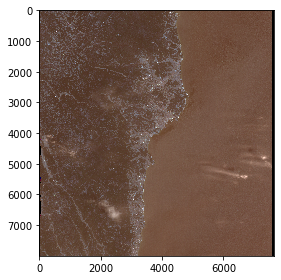

In [37]:
#0～23までのRGB合成画像が確認できる
io.imshow(rgb_img[0])

In [27]:
#画像の書き込み
for j in range(len(rgb_img)):
    cv2.imwrite("%02.f"%j +".png",rgb_img[j])